In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data = load_breast_cancer()

In [6]:
X = data.data
y = data.target

In [7]:
lrl1 = LR(penalty="l1", solver="liblinear", C = 0.5, max_iter=1000)
lrl2 = LR(penalty="l2", solver="liblinear", C = 0.5, max_iter=1000)

In [8]:
lrl1 = lrl1.fit(X, y)

In [9]:
#查看每个特征所对应的参数
lrl1.coef_

array([[ 3.99985481,  0.03187392, -0.13706324, -0.01621906,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50482263,  0.        , -0.07127358,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24580744, -0.12851402, -0.01441227,  0.        ,
         0.        , -2.04061994,  0.        ,  0.        ,  0.        ]])

In [11]:
#查看不为0的特征的数量
(lrl1.coef_ != 0).sum(axis = 1)

array([10])

In [12]:
lrl2 = lrl2.fit(X, y)

In [13]:
#l1和l2正则化的核心区别就是l1正则化会将系数压缩到0，而l2正则化不会
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

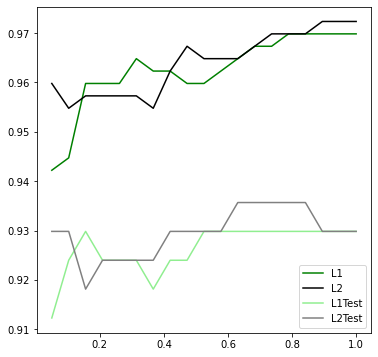

In [14]:
l1 = []
l2 = []
l1test = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.3, random_state = 420)

#绘制C的学习曲线
for i in np.linspace(0.05, 1, 19):
    lrl1 = LR(penalty="l1", solver="liblinear", C = i, max_iter=1000)
    lrl2 = LR(penalty="l2", solver="liblinear", C = i, max_iter=1000)
    lrl1 = lrl1.fit(Xtrain, Ytrain)
    
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    lrl2 = lrl2.fit(Xtrain, Ytrain)
    
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l1, l2, l1test, l2test]
    
color = ["green", "black", "lightgreen", "gray"]
label = ["L1", "L2", "L1Test", "L2Test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05, 1, 19), graph[i], color[i], label = label[i])

plt.legend(loc = 4)
plt.show()
    